# Instructions:

## Getting Started
In this exercise, we will be using data from `rolling stone's top 500 albums`. We have this data contained in the `data.csv` file. We will be building out the following functions to answer questions and interact with this data.

> **remember:** reading from a csv file in python looks like the following:

```python 
import csv

    with open(file_name) as f:
        # we are using DictReader because we want our information to be in dictionary format.
        reader = csv.DictReader(f)
        # some more code
```

Once we have our `reader` reading our file as dictionaries, we want our data to be a list of dictionaries. So, we need to loop through our `reader` and create a list. *hint: list comprehension / for loops are your friend"

```python
# our data will look something like this once we have read it and turned it into a list of `OrderedDict`s
# don't worry, the ordered dicts look different but we can interact with them the same way we do normal dicts
[OrderedDict([('number', '1'), ('year', '1967'), ('album', "Sgt. Pepper's Lonely Hearts Club Band"), ('artist', 'The Beatles'), ('genre', 'Rock'), ('subgenre', 'Rock & Roll, Psychedelic Rock')]), OrderedDict([('number', '2'), ('year', '1966'), ('album', 'Pet Sounds'), ('artist', 'The Beach Boys'), ('genre', 'Rock'), ('subgenre', 'Pop Rock, Psychedelic Rock')]), OrderedDict([('number', '3'), ('year', '1966'), ('album', 'Revolver'), ('artist', 'The Beatles'), ('genre', 'Rock'), ('subgenre', 'Psychedelic Rock, Pop Rock')])]
```

After we have our data formated the way we want it, we can now begin working on defining our functions.


### Functions to build-out:

Each of the following functions can be defined in the `functions.py` file. 

* **Searching functions**
  * Find by name - Takes in a string that represents the name of an album. Should return a dictionary with the correct album, or return `None`.
  * Find by rank - Takes in a number that represents the rank in the list of top albums and returns the album with that rank. If there is no album with that rank, it returns `None`.
  * Find by year - Takes in a number for the year in which an album was released and returns a list of albums that were released in that year. If there are no albums released in the given year, it returns an empty list.
  * Find by years - Takes in a start year and end year. Returns a list of all albums that were released on or between the start and end years. If no albums are found for those years, then an empty list is returned. 
  * Find by ranks - Takes in a start rank and end rank. Returns a list of albums that are ranked between the start and end ranks. If no albums are found for those ranks, then an empty list is returned.
* **All functions**
  * All titles - Returns a list of titles for each album.
  * All artists - Returns a list of artist names for each album.
* **Questions to answer / functions**
  * Artists with the most albums - Returns the artist with the highest amount of albums on the list of top albums 
  * Most popular word - Returns the word used most in amongst all album titles
  * Histogram of albums by decade - Returns a histogram with each decade pointing to the number of albums released during that decade.
  * Histogram by genre - Returns a histogram with each genre pointing to the number of albums that are categorized as being in that genre.

In [4]:
import csv
with open('data.csv') as f:
    reader = csv.DictReader(f)
    data = [album for album in reader]
#data

In [5]:
def find_by_name(album, data):
    for entry in data:
        if entry['album'] == album:
            return entry
    else:
        return None
            
#find_by_name('London Calling', data)

In [6]:
def find_by_rank(num, data):
    for entry in data:
        if entry['number'] == num:
            return entry
        
    else:
        return None

       
#find_by_rank('50', songs_top_500)

In [7]:
def find_by_year(year, data):
    for entry in data:
        if 'album' in entry.keys():
            albums_by_year = [entry['album'] for entry in data if entry['year']== year]
            return albums_by_year
        else:
            songs_by_year =[entry['name'] for entry in data if entry['year']== year]
            return songs_by_year
#find_by_year('1970', data)

In [8]:
def find_by_years(year_1, year_2, data):
    for entry in data:
        if 'album' in entry.keys():
            albums_between_years = [entry['album'] for entry in data if int(entry['year']) in range(year_1, year_2+1)]
            return albums_between_years
        else:
            names_between_years = [entry['name'] for entry in data if int(entry['year']) in range(year_1, year_2+1)]
            return names_between_years

In [9]:
#find_by_years(1960, 1961, data)

In [10]:
def find_by_ranks(rank_1, rank_2, data):
    for entry in data:
        if 'album' in entry.keys():
            album_ranks_between = [entry['album'] for entry in data if int(entry['number']) in range(rank_1, rank_2+1)]
            return album_ranks_between
        else:
            song_ranks_between =[entry['name'] for entry in data if int(entry['number']) in range(rank_1, rank_2+1)]
            return song_ranks_between
#find_by_ranks(1, 5, data)

In [11]:
def all_titles(data):
    for entry in data:
        if 'album'in entry.keys():
            album_title_list = [entry['album'] for entry in data]
            return album_title_list
        else:
            song_title_list = [entry['name'] for entry in data]
            return song_title_list
#all_titles(data)

In [12]:
def all_artists(data):
    artist_list = []
    for artist in data:
        artist_list.append(artist['artist'])
    return artist_list
#all_artists(data)        

In [13]:
def best_artist(data):
    artist_list = all_artists(data)
    artist_dict = {}
    for artist in artist_list:
        if artist in artist_dict:
            artist_dict[artist] += 1
        else:
            artist_dict[artist] = 1
    for artist, number in artist_dict.items():
        if number == max(artist_dict.values()):
            return artist
#best_artist(data)

In [14]:
def best_word(data):
    word_count = {}
    for entry in data:
        if 'album' in entry.keys():
            albums = [entry['album'].split() for entry in data]
            for album in albums:
                for word in album:
                    if word in word_count:
                        word_count[word] += 1
                    else:
                        word_count[word] = 1
        else:
            if 'name' in entry.keys():
                songs = [entry['name'].split() for entry in data]
                for song in songs:
                    for word in song:
                        if word in word_count:
                            word_count[word] += 1
                        else:
                            word_count[word] = 1
    for word, count in word_count.items():
        if count == max(word_count.values()):
            return word
#best_word(songs_top_500)

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [16]:
def by_decade(data):
    fifties = [1950 for x in range(len(find_by_years(1950, 1959, data)))]
    sixties = [1960 for x in range(len(find_by_years(1960, 1969, data)))]
    seventies = [1970 for x in range(len(find_by_years(1970, 1979, data)))]
    eighties = [1980 for x in range(len(find_by_years(1980, 1989, data)))]
    nineties = [1990 for x in range(len(find_by_years(1990, 1999, data)))]
    two_thousands = [2000 for x in range(len(find_by_years(2000, 2009, data)))]
    twenty_tens = [2010 for x in range(len(find_by_years(2010, 2019, data)))]

    decades = fifties + sixties + seventies + eighties + nineties + two_thousands + twenty_tens
    return decades

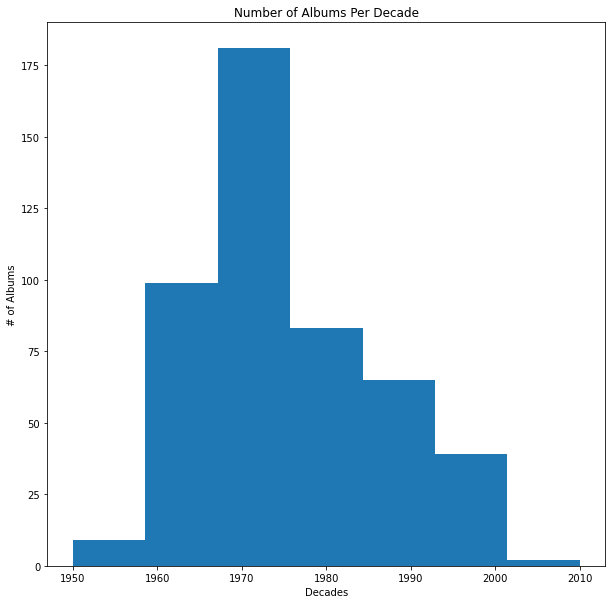

In [17]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.hist(by_decade(data), bins = 7)
ax.set_xlabel('Decades');
ax.set_ylabel('# of Albums')
ax.set_title('Number of Albums Per Decade');

In [18]:
def all_genres(data):
    genres = []
    for genre in data:
        genres.append(genre['genre'])
    return set(genres)

In [19]:
#all_genres(data)

## Next Steps

In [20]:
text_file = open('top-500-songs.txt', 'r')
lines = text_file.readlines()

#print(lines)

In [22]:
songs = [line.replace('\n', '').split('\t') for line in lines]

songs_top_500 = [{'number': song[0], 'name': song[1], 'artist': song[2], 'year': song[3]} for song in songs]

#songs_top_500[0]

In [23]:
#find_by_rank('5', songs_top_500)

Now that we have our functions querying our Album data, let's compare that data with the top 500 songs. We have another file -- a text file! -- that contains the data we need for the top 500 songs. Reading a text file is pretty similar to reading a csv file, however, it tends to need a bit more massaging to get your data formatted the way you want it.

```python
    # open the text file in read
    text_file = open('top-500-songs.txt', 'r')
    # read each line of the text file
    # here is where you can print out the lines to your terminal and get an idea 
    # for how you might think about re-formatting the data
    lines = text_file.readlines()

    print(lines)
    # the output will look something like this:
['1\tLike a Rolling Stone\tBob Dylan\t1965\n', '2\tSatisfaction\tThe Rolling Stones\t1965\n', '3\tImagine\tJohn Lennon\t1971\n', "4\tWhat's Going On\tMarvin Gaye\t1971\n", '5\tRespect\tAretha Franklin\t1967\n', '6\tGood Vibrations\tThe Beach Boys\t1966\n', '7\tJohnny B. Goode\tChuck Berry\t1958\n', '8\tHey Jude\tThe Beatles\t1968\n', ...]
```

It looks like `\t` is how the text file is separating each element on a line. So, we need a function that can separate a string into a list. Then we can tell this function on what to split our string (i.e. `\t`). From there we will have a list of lists that are formatted like the following:
```python
["RANK", "NAME", "ARTIST", "YEAR"]
```
We need to use our knowledge of iterating to go through each of these elements and turn them into dictionaries with the keys, "rank", "name", "artist", "year", pointing to the appropriate values. So, for song number 1, we want it to look like:
```python
{'rank': 1, 'name': "Like a Rolling Stone", 'artist'"Bob Dylan": , 'year': 1965}
```

Once we have a list of songs that are formatted like the above, we can move on to figuring out which songs are from the top albums and which albums and artists have the most 'top songs'.

### Working with the top 500 songs

If we can't already re-use our searching functions (i.e. Find by name, Find by rank, Find by year, Find by years, Find by ranks), all functions (i.e. all titles, all artists), and questions-to-answer functions (i.e. Artists with the most albums (or songs), Most popular word, Histogram by decade, Histogram by genre) with the song data we just formatted, then refactor these functions so that they can be used with either set of data. This is a good practice for ensuring that our code is as reusable and modular as possible, which is important when writing code for any project, especially when it comes time to scale a project. Things are easier to read, and there is less code to worry about (and more importantly there is less code to debug when something goes wrong).

Once we have our functions working for both sets of data, we can start writing new functions!

Luckily for us, this next dataset is already made for us. We were curious to find out which songs on the top 500 songs overlapped with the top albums and vice versa. So, we created a data set that is a list of dictionaries in JSON format. Each dictionary contains the name of the artist, the album, and the tracks (songs) on that given album. We can use this data to check which songs on the top 500 list are featured on the albums on the top albums list.

To load our JSON file we will write:

```python
import json

file = open('track_data.json', 'r')
json_data = json.load(file)

print(json_data)
# output will look like this:
[{'artist': 'The Beatles', 'album': "Sgt. Pepper's Lonely Hearts Club Band", 'tracks': ["Sgt. Pepper's Lonely Hearts Club Band - Remix", 'With A Little Help From My Friends - Remix', 'Lucy In The Sky With Diamonds - Remix', 'Getting Better - Remix', 'Fixing A Hole - Remix', "She's Leaving Home - Remix", 'Being For The Benefit Of Mr. Kite! - Remix', 'Within You Without You - Remix', "When I'm Sixty-Four - Remix", 'Lovely Rita - Remix', 'Good Morning Good Morning - Remix', "Sgt. Pepper's Lonely Hearts Club Band (Reprise) - Remix", 'A Day In The Life - Remix', "Sgt. Pepper's Lonely Hearts Club Band - Take 9 And Speech", 'With A Little Help From My Friends - Take 1 / False Start And Take 2 / Instrumental', 'Lucy In The Sky With Diamonds - Take 1', 'Getting Better - Take 1 / Instrumental And Speech At The End', 'Fixing A Hole - Speech And Take 3', "She's Leaving Home - Take 1 / Instrumental", 'Being For The Benefit Of Mr. Kite! - Take 4', 'Within You Without You - Take 1 / Indian Instruments', "When I'm Sixty-Four - Take 2", 'Lovely Rita - Speech And Take 9', 'Good Morning Good Morning - Take 8', "Sgt. Pepper's Lonely Hearts Club Band (Reprise) - Speech And Take 8", 'A Day In The Life - Take 1 With Hums', 'Strawberry Fields Forever - Take 7', 'Strawberry Fields Forever - Take 26', 'Strawberry Fields Forever - Stereo Mix 2015', 'Penny Lane - Take 6 / Instrumental', 'Penny Lane - Stereo Mix 2017']}, {'artist': 'The Beach Boys', 'album': 'Pet Sounds', 'tracks': ["Wouldn't It Be Nice - Digitally Remastered 96", 'You Still Believe In Me - Digitally Remastered 96', "That's Not Me - 1996 Digital Remaster", "Don't Talk (Put Your Head On My Shoulder) - 1996 Digital Remaster", "I'm Waiting For The Day - Digitally Remastered 96", "Let's Go Away For Awhile - Digitally Remastered 96", 'Sloop John B - 1996 - Remaster', 'God Only Knows - 1997 - Remaster', "I Know There's An Answer - Digitally Remastered 96", 'Here Today - Digitally Remastered 96', "I Just Wasn't Made For These Times - Digitally Remastered 96", 'Pet Sounds - Digitally Remastered 96', 'Caroline, No - 1996 Digital Remaster', 'Hang On To Your Ego', "Wouldn't It Be Nice - 2000 - Remaster", 'You Still Believe In Me - 1996 Digital Remaster', "That's Not Me - 1996 Digital Remaster", "Don't Talk (Put Your Head On My Shoulder) - 1996 Digital Remaster", "I'm Waiting For The Day - 1996 Digital Remaster", "Let's Go Away For Awhile - 1996 Digital Remaster", 'Sloop John B - 1996 Digital Remaster', 'God Only Knows - 1996 Digital Remaster', "I Know There's An Answer - 1996 Digital Remaster", 'Here Today - 1996 Digital Remaster', "I Just Wasn't Made For These Times - 1996 Digital Remaster", 'Pet Sounds - 1996 Digital Remaster', 'Caroline, No - 1996 Digital Remaster']}, {'artist': 'The Beatles', 'album': 'Revolver', 'tracks': ['Taxman - Remastered', 'Eleanor Rigby - Remastered', "I'm Only Sleeping - Remastered", 'Love You To - Remastered', 'Here, There And Everywhere - Remastered', 'Yellow Submarine - Remastered', 'She Said She Said - Remastered', 'Good Day Sunshine - Remastered', 'And Your Bird Can Sing - Remastered', 'For No One - Remastered', 'Doctor Robert - Remastered', 'I Want To Tell You - Remastered', 'Got To Get You Into My Life - Remastered', 'Tomorrow Never Knows - Remastered']}, {'artist': 'Bob Dylan', 'album': 'Highway 61 Revisited', 'tracks': ['Like a Rolling Stone', 'Tombstone Blues', 'It Takes a Lot to Laugh, It Takes a Train to Cry', 'From a Buick 6', 'Ballad of a Thin Man', 'Queen Jane Approximately', 'Highway 61 Revisited', "Just Like Tom Thumb's Blues", 'Desolation Row']}, ...]
```

In [24]:
import json

file = open('track_data.json', 'r')
song_info = json.load(file)

#print(song_info)

### Define the following functions:

**albumWithMostTopSongs** - returns the name of the artist and album that has that most songs featured on the top 500 songs list

**albumsWithTopSongs** - returns a list with the name of only the albums that have tracks featured on the list of top 500 songs

**songsThatAreOnTopAlbums** - returns a list with the name of only the songs featured on the list of top albums

**top10AlbumsByTopSongs** - returns a histogram with the 10 albums that have the most songs that appear in the top songs list. The album names should point to the number of songs that appear on the top 500 songs list.

**topOverallArtist** - Artist featured with the most songs and albums on the two lists. This means that if Brittany Spears had 3 of her albums featured on the top albums listed and 10 of her songs featured on the top songs, she would have a total of 13. The artist with the highest aggregate score would be the top overall artist.

In [25]:
def albumWithMostTopSongs(song_info, songs_top_500):
    songs = all_titles(songs_top_500)
    album_counter = {}
    
    for song in songs:
        for album in song_info:
            if song in album['tracks']:
                if album['album'] in album_counter:
                    album_counter[album['album']] +=1
                else:
                    album_counter[album['album']] =1

    top_value = max(album_counter.values())
    
    for key, value in album_counter.items():
        if value == top_value:
            top_album = key
    for entry in song_info:
        if entry['album'] == top_album:
            top_artist = entry['artist']
    return (top_album , top_artist)
    #for entry in data:
        #if entry['album'] == top_album:
            #top_artist = entry['artist']
    #return (top_album , top_artist)

In [26]:
#albumWithMostTopSongs(song_info, songs_top_500)

In [41]:
def albumsWithTopSongs(song_info, songs_top_500):
    songs = all_titles(songs_top_500)
    album_list = []
    for song in songs:
        for album in song_info:
            if song in album['tracks']:
                album_list.append(album['album'])
    return album_list

In [35]:
#albumsWithTopSongs(song_info, songs_top_500)
#all_titles(data)

In [44]:
def songsOnTopAlbums(song_info, data):
    albums = all_titles(data)
    song_list = []
    for album in albums:
        for track in song_info:
            if album in track['album']:
                song_list.append(track['tracks'])
    return song_list
            

In [46]:
#songsOnTopAlbums(song_info, data)

In [47]:
def top10AlbumsByTopSongs(song_info, songs_top_500):
    songs = all_titles(songs_top_500)
    album_counter = {}
    
    for song in songs:
        for album in song_info:
            if song in album['tracks']:
                if album['album'] in album_counter:
                    album_counter[album['album']] +=1
                else:
                    album_counter[album['album']] =1
    sorted_counter = sorted(album_counter.items(), key = lambda kv: kv[1], reverse=True)
    num_of_songs_per_album = {a:b for a,b in sorted_counter[:10]}
    
    return num_of_songs_per_album

In [51]:
top_ten_dict = top10AlbumsByTopSongs(song_info, songs_top_500)


<ipython-input-54-1545257d1c62>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_ten_dict.keys(), rotation='vertical')


Text(0, 0.5, 'Song Count')

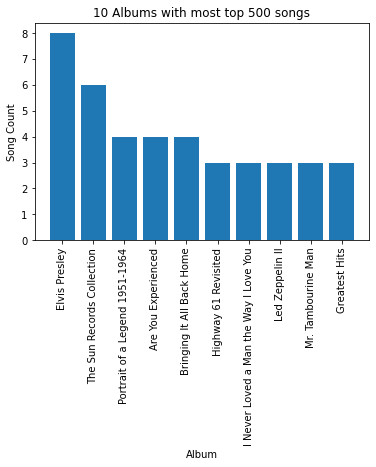

In [54]:
fig, ax = plt.subplots()
ax.bar(top_ten_dict.keys(), top_ten_dict.values())
ax.set_title('10 Albums with most top 500 songs')
ax.set_xticklabels(top_ten_dict.keys(), rotation='vertical')
ax.set_xlabel('Album')
ax.set_ylabel('Song Count')

In [55]:
from collections import Counter
def topOverallArtist(data, songs_top_500):
    artist_album_count = Counter(all_artists(data))
    artist_song_count = Counter(all_artists(songs_top_500))
    for artist in artist_album_count:
        if artist in artist_song_count:
            artist_song_count[artist] += artist_album_count[artist]
        else:
            artist_song_count[artist] = artist_album_count[artist]
            
    maximum_agg = max(artist_song_count.values())
    lst = []
    for key, value in artist_song_count.items():
        if value == maximum_agg:
            lst.append(key)
    return lst

In [57]:
#topOverallArtist(data, songs_top_500)